<a href="https://colab.research.google.com/github/fxnnxc/NLP_visualization/blob/master/6.%20Sequence_Logo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sequence Logo

* 코드 출처 : https://stackoverflow.com/questions/42615527/sequence-logos-in-matplotlib-aligning-xticks

In [43]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn
from matplotlib import transforms

In [107]:
all_score = [[('Kr',np.random.random()), ('Fr',np.random.random()), ('USA',np.random.random()), ('Ch',np.random.random())] for i in range(10)]

In [106]:
COLOR_SCHEME = {'Fr': 'blue', 
                'Kr': 'red', 
                'USA': 'Black', 
                'Ch': 'orange'}

def draw_logo(all_scores, fontfamily='Arial', size=25):
    mpl.rcParams['font.family'] = fontfamily

    fig, ax = plt.subplots(figsize=(len(all_scores), 3))

    font = FontProperties()
    font.set_size(size)
    font.set_weight('bold')

    #font.set_family(fontfamily)

    ax.set_xticks(range(1,len(all_scores)+1))    
    ax.set_yticks(range(0,1))
    ax.set_xticklabels(range(1,len(all_scores)+1), rotation=45)
    ax.set_yticklabels(np.arange(0,3,1))   
    ax.set_ylim(0, 30)
    seaborn.despine(ax=ax, trim=True)

    trans_offset = transforms.offset_copy(ax.transData, 
                                      fig=fig, 
                                      x=1, 
                                      y=0, 
                                      units='dots')

    for index, scores in enumerate(all_scores):
        yshift = 0
        for base, score in scores:
            txt = ax.text(index+1, 
                      0, 
                      base, 
                      transform=trans_offset,
                      fontsize=80, 
                      color=COLOR_SCHEME[base],
                      ha='center',
                      fontproperties=font,

                     )
            txt.set_path_effects([Scale(1.0, score)])
            fig.canvas.draw()
            window_ext = txt.get_window_extent(txt._renderer)
            yshift = window_ext.height*score
            trans_offset = transforms.offset_copy(txt._transform, 
                                                fig=fig,
                                                y=yshift,
                                                units='points')
        trans_offset = transforms.offset_copy(ax.transData, 
                                          fig=fig, 
                                          x=1, 
                                          y=0, 
                                          units='points')    
plt.show()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


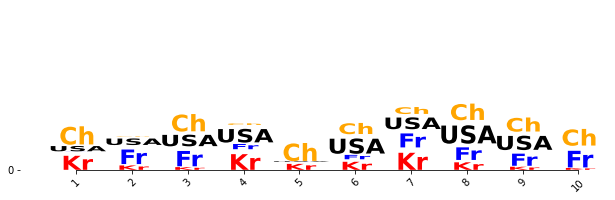

In [108]:
draw_logo(all_scores=all_score)